## EXL EQ Case Study – PM2.5 Prediction 


Covid-19 has changed lives across the globe. As the world looks back over the past three years of crisis that has affected so many lives & livelihood, today the more pertinent question then becomes “Are we safe now?” However, one of the most critical public health crisis that demands urgent action today is the rapid growth in Air Pollution. “The air that keeps us alive is making us sick” – warn US experts. With the recently released 5th annual World Air Quality Report 2022, India became world’s 8th most polluted country with an annual average PM2.5 concentration which is 10 times more than the WHO’s recommended level. Key concern is the exposure of heavy concentration of lung-damaging micro-airborne particles called PM2.5. It has been linked to the development of chronic respiratory, cardiovascular, cerebrovascular diseases, lung cancer.


### Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
df=pd.read_csv('EXL_EQ_2023_Dataset.csv')

In [4]:
df.head()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,NaN,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 04:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 08:00
3,186.603123,56.922094,114.142207,91.504524,NaN,12.217971,1.405930,30.493537,3.884649,104.475114,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 12:00
4,262.616309,77.363086,123.790340,117.065760,NaN,13.331616,2.692100,18.045684,5.605006,96.718827,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 16:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223584 entries, 0 to 223583
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   PM2.5                                             218044 non-null  float64
 1   NO                                                218735 non-null  float64
 2   NO2                                               218244 non-null  float64
 3   NOx                                               217612 non-null  float64
 4   NH3                                               217948 non-null  float64
 5   SO2                                               219700 non-null  float64
 6   CO                                                219762 non-null  float64
 7   Ozone                                             219154 non-null  float64
 8   Benzene                                           217487 non-null  float64
 9   Tolu

### Getting various insights of data such as mean , max , min and quartiles value of data

In [6]:
df.describe()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Latitude,Longitude,Total Length of Roads as of 2019(Km),Length of National Highways as of 2022(Km),Railway Route as of 2021(Km),Forest Cover as of 2021(sq Km),Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL/HYBRID
count,218044.000000,218735.000000,218244.000000,217612.000000,217948.000000,219700.000000,219762.000000,219154.000000,217487.000000,167030.000000,...,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000
mean,69.213957,14.072135,30.366790,30.736544,26.234892,13.945535,0.987377,31.138962,3.730146,19.040600,...,24.619147,80.321382,286961.117647,7288.029412,4573.882353,21637.235294,11424.088235,20314.823529,5.938235,58.750295
std,56.962718,22.097622,31.883841,31.688403,20.545715,10.851849,0.792493,21.908442,5.709067,24.739317,...,5.056692,5.417350,159073.751285,4531.545100,3094.274920,19508.426850,8986.112066,13297.869679,0.933690,94.245640
min,0.100000,0.010000,0.010000,0.000000,0.100000,0.010000,0.000000,0.030000,0.000000,0.000000,...,8.486000,72.587000,2573.000000,15.000000,13.000000,23.000000,204.000000,225.000000,3.600000,0.000000
25%,30.340937,4.006669,12.175122,13.329495,13.053931,6.357942,0.476443,14.784502,0.872648,2.444047,...,23.026000,77.026000,120034.000000,3620.000000,1703.000000,14818.000000,3892.000000,7323.000000,5.500000,1.000000
50%,51.630955,6.727626,19.174929,21.085326,20.984008,11.360059,0.821914,27.112538,2.198147,8.847500,...,25.519500,78.095000,298205.000000,7257.000000,4212.000000,14872.000000,9694.000000,25385.000000,6.100000,13.000000
75%,91.310000,13.334686,36.976778,35.779768,33.487317,18.810202,1.213776,42.196887,4.028444,23.859738,...,28.411000,83.010000,442907.000000,12245.000000,8799.000000,23659.000000,16184.000000,29230.000000,6.500000,46.000000
max,890.873920,359.241357,300.479696,394.141771,412.902722,195.550000,9.472610,197.200000,205.880300,360.394123,...,34.086000,93.944000,636887.000000,18317.000000,8799.000000,77493.000000,38837.000000,43446.000000,7.900000,457.000000


In [7]:
df.isnull().sum().sort_values(ascending=False)

CH4                                                 217008
VWS                                                 179561
Temp                                                172116
O Xylene                                            100446
Xylene                                               85753
BP                                                   64451
Toluene                                              56554
MP-Xylene                                            49322
Eth-Benzene                                          44297
RH                                                   27211
AT                                                   21570
SR                                                   16383
CNG ONLY                                             13152
WS                                                    7080
Benzene                                               6097
NOx                                                   5972
RF                                                    59

#### Many Columns are there which are having large no. of null values 

In [8]:
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

CH4                                                 97.058824
VWS                                                 80.310308
Temp                                                76.980464
O Xylene                                            44.925397
Xylene                                              38.353818
BP                                                  28.826302
Toluene                                             25.294297
MP-Xylene                                           22.059718
Eth-Benzene                                         19.812241
RH                                                  12.170370
AT                                                   9.647381
SR                                                   7.327447
CNG ONLY                                             5.882353
WS                                                   3.166595
Benzene                                              2.726939
NOx                                                  2.671032
RF      

In [9]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF',
       'VWS', 'Eth-Benzene', 'Xylene', 'MP-Xylene', 'O Xylene', 'CH4', 'City',
       'State', 'Population as of 2021 (Estimated)', 'Latitude', 'Longitude',
       'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG',
       'PETROL/HYBRID', 'Time Periods'],
      dtype='object')

##### The columns containing the higher no. of null values and that doesnt have more direct impact on PM2.5 should be dropped

In [10]:
data=df.drop(['Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF',
       'VWS', 'Eth-Benzene', 'Xylene', 'MP-Xylene', 'O Xylene', 'CH4', 'Population as of 2021 (Estimated)', 'Latitude', 'Longitude',
       'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG',
       'PETROL/HYBRID', ],axis=1)
data

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,City,State,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,NaN,NaN,Delhi,Delhi,2020-01-01 00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,NaN,Delhi,Delhi,2020-01-01 04:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,NaN,Delhi,Delhi,2020-01-01 08:00
3,186.603123,56.922094,114.142207,91.504524,NaN,12.217971,1.405930,30.493537,3.884649,104.475114,Delhi,Delhi,2020-01-01 12:00
4,262.616309,77.363086,123.790340,117.065760,NaN,13.331616,2.692100,18.045684,5.605006,96.718827,Delhi,Delhi,2020-01-01 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223579,196.989121,60.688939,88.463906,104.906711,109.511292,53.108086,2.336561,55.699203,3.684526,7.927572,Mumbai,Maharashtra,2022-12-31 04:00
223580,187.428487,56.707438,93.311216,103.099160,106.682026,55.535340,2.235001,73.030945,3.388236,6.980251,Mumbai,Maharashtra,2022-12-31 08:00
223581,176.635690,28.382382,87.318776,80.058537,110.258415,53.701056,1.754315,93.830288,3.328736,6.993954,Mumbai,Maharashtra,2022-12-31 12:00
223582,189.740021,12.664340,54.773063,51.766913,67.224030,40.155829,1.361177,73.099207,2.423073,4.875033,Mumbai,Maharashtra,2022-12-31 16:00


#### The 'Time Period' Column is in the data type string so we have to convert it into datetime datatype and extract date, year and month from it 

In [11]:
data['Time Periods']=pd.to_datetime(data['Time Periods'])
data['year']=data['Time Periods'].dt.year
data['month']=data['Time Periods'].dt.month
data['day']=data['Time Periods'].dt.day
data['hour']=data['Time Periods'].dt.hour
data['mins']=data['Time Periods'].dt.minute
data['seconds']=data['Time Periods'].dt.second
data['Month_Year'] = data['Time Periods'].dt.to_period('M')
data.describe()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,year,month,day,hour,mins,seconds
count,218044.000000,218735.000000,218244.000000,217612.000000,217948.000000,219700.000000,219762.000000,219154.000000,217487.000000,167030.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.0,223584.0
mean,69.213957,14.072135,30.366790,30.736544,26.234892,13.945535,0.987377,31.138962,3.730146,19.040600,2020.999088,6.521898,15.732664,10.000000,0.0,0.0
std,56.962718,22.097622,31.883841,31.688403,20.545715,10.851849,0.792493,21.908442,5.709067,24.739317,0.816684,3.448994,8.801390,6.831316,0.0,0.0
min,0.100000,0.010000,0.010000,0.000000,0.100000,0.010000,0.000000,0.030000,0.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,30.340937,4.006669,12.175122,13.329495,13.053931,6.357942,0.476443,14.784502,0.872648,2.444047,2020.000000,4.000000,8.000000,4.000000,0.0,0.0
50%,51.630955,6.727626,19.174929,21.085326,20.984008,11.360059,0.821914,27.112538,2.198147,8.847500,2021.000000,7.000000,16.000000,10.000000,0.0,0.0
75%,91.310000,13.334686,36.976778,35.779768,33.487317,18.810202,1.213776,42.196887,4.028444,23.859738,2022.000000,10.000000,23.000000,16.000000,0.0,0.0
max,890.873920,359.241357,300.479696,394.141771,412.902722,195.550000,9.472610,197.200000,205.880300,360.394123,2022.000000,12.000000,31.000000,20.000000,0.0,0.0


### Filling the null values with the data, to avoid the ambiguity in the data

In [12]:
# Trying mean, median, f/b fill, 0 and interpolation for filling the data

numeric_columns = data.select_dtypes(include='number').columns

#mean - 3rd best
# data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean(axis=0))

#median
# data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median(axis=0))

#ffill / bfill - 2nd best
# data[numeric_columns] = data[numeric_columns].fillna(method='bfill')
# data[numeric_columns] = data[numeric_columns].fillna(method='ffill')

#Interpolation - working the best (0.83 rfc score)
data[numeric_columns] = data[numeric_columns].interpolate(method='cubic')
data[numeric_columns] = data[numeric_columns].fillna(method='bfill')

#Filling 0
# data.fillna(0,inplace=True)

In [13]:
data.head()
# data.isnull().sum().sort_values(ascending=False)

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,City,State,Time Periods,year,month,day,hour,mins,seconds,Month_Year
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,9.827428,104.475114,Delhi,Delhi,2020-01-01 00:00:00,2020,1,1,0,0,0,2020-01
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,104.475114,Delhi,Delhi,2020-01-01 04:00:00,2020,1,1,4,0,0,2020-01
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,104.475114,Delhi,Delhi,2020-01-01 08:00:00,2020,1,1,8,0,0,2020-01
3,186.603123,56.922094,114.142207,91.504524,78.964747,12.217971,1.405930,30.493537,3.884649,104.475114,Delhi,Delhi,2020-01-01 12:00:00,2020,1,1,12,0,0,2020-01
4,262.616309,77.363086,123.790340,117.065760,77.051167,13.331616,2.692100,18.045684,5.605006,96.718827,Delhi,Delhi,2020-01-01 16:00:00,2020,1,1,16,0,0,2020-01


## Data Visualisation

In [14]:
data['State'].value_counts()

Uttar Pradesh        59184
Bihar                19728
West Bengal          13152
Haryana              13152
Rajasthan            13152
Chhattisgarh         13152
Gujarat              13152
Madhya Pradesh       13152
Tamil Nadu            6576
Chandigarh            6576
Karnataka             6576
Delhi                 6576
Jammu and Kashmir     6576
Tripura               6576
Kerala                6576
Manipur               6576
Assam                 6576
Maharashtra           6576
Name: State, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Gujarat'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Haryana'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Manipur'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Tripura'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Jammu and Kashmir'),
  Text(11, 0, 'West Bengal'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Chhattisgarh'),
  Text(15, 0, 'Chandigarh'),
  Text(16, 0, 'Tamil Nadu'),
  Text(17, 0, 'Maharashtra')])

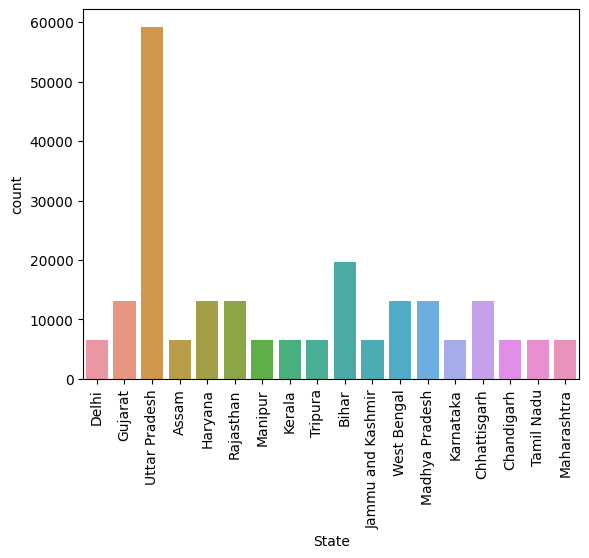

In [15]:
sns.countplot(data=data,x=data['State'])
plt.xticks(rotation = 90)

#### From above plot we can conclude that we are having more no. of data samples from the UP state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Ahmedabad'),
  Text(2, 0, 'Gandhinagar'),
  Text(3, 0, 'Lucknow'),
  Text(4, 0, 'Varanasi'),
  Text(5, 0, 'Meerut'),
  Text(6, 0, 'Prayagraj'),
  Text(7, 0, 'Ghaziabad'),
  Text(8, 0, 'Agra'),
  Text(9, 0, 'Noida'),
  Text(10, 0, 'Kanpur'),
  Text(11, 0, 'Moradabad'),
  Text(12, 0, 'Guwahati'),
  Text(13, 0, 'Faridabad'),
  Text(14, 0, 'Gurugram'),
  Text(15, 0, 'Jaipur'),
  Text(16, 0, 'Kota'),
  Text(17, 0, 'Imphal'),
  Text(18, 0, 'Thiruvananthapuram'),
  Text(19, 0, 'Agartala'),
  Text(20, 0, 'Gaya'),
  Text(21, 0, 'Muzaffarpur'),
  Text(22, 0, 'Patna'),
  Text(23, 0, 'Srinagar'),
  Text(24, 0, 'Howrah'),
  Text(25, 0, 'Kolkata'),
  Text(26, 0, 'Bhopal'),
  Text(27, 0, 'Gwalior'),
  Text(28, 0, 'Bengaluru'),
  Text(29, 0, 'Raipur'),
  Text(30, 0, 'Bhilai'),
  Text(31, 0, 'Chandigarh'),
  Text(3

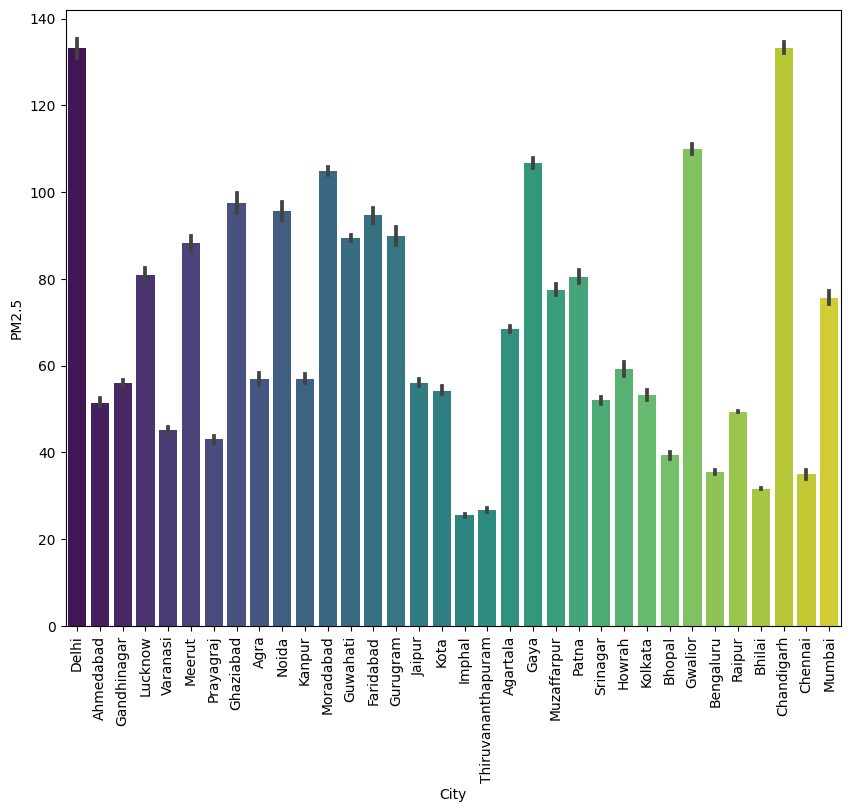

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['City'],y=data['PM2.5'],data=data,palette='viridis')
plt.xticks(rotation = 90)

### The most PM2.5 conc. cities are 'Delhi','Chandigrah','Gwalior',Gaya' and so on....

In [17]:
data[data['PM2.5']==data['PM2.5'].max()]

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,City,State,Time Periods,year,month,day,hour,mins,seconds,Month_Year
30713,1018.626461,14.269986,21.520646,26.300962,15.606701,6.260782,0.739714,13.016632,4.981465,32.41,Agra,Uttar Pradesh,2020-01-01 20:00:00,2020,1,1,20,0,0,2020-01


### Agra City have recorded higher concentration of PM2.5 all over India from the last 3 years

In [18]:
df3=pd.DataFrame(data[['PM2.5','Month_Year','City']].groupby(['Month_Year']).mean())

In [19]:
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()


In [20]:
df3.iplot(kind='line')

### General trend of conc. of PM2.5 over the last 3 years

## Feature Engineering

#### Ml model doesn't understand categorical value so we have to convert it into numeric value so that model can detect it ,so  we had used LabelEncoder method  

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['City']=le.fit_transform(data['City'])
data['City'].values

array([ 8,  8,  8, ..., 25, 25, 25])

#### Bell curve to detect the outlier data

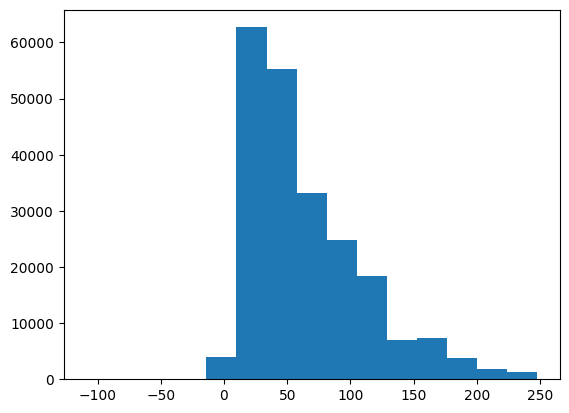

In [50]:
from scipy.stats import norm
plt.hist(data['PM2.5'],bins=15)
rng=np.arange(data['PM2.5'].max(),data['PM2.5'].min(),20)
plt.plot(rng,norm.pdf(rng,data['PM2.5'].mean(),data['PM2.5'].std()),color='black')

### Outlier detection by Z score method

In [23]:
# Outlier detection by Z score method
data['Z score']=(data['PM2.5']-data['PM2.5'].mean())/data['PM2.5'].std()
data=data[(data['Z score']>-3) & (data['Z score'] <3)]
data.head()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,State,Time Periods,year,month,day,hour,mins,seconds,Month_Year,Z score
3,186.603123,56.922094,114.142207,91.504524,78.964747,12.217971,1.405930,30.493537,3.884649,104.475114,...,Delhi,2020-01-01 12:00:00,2020,1,1,12,0,0,2020-01,1.973228
9,165.553108,53.630866,113.327242,86.641354,56.094949,16.946714,0.974595,28.187731,4.256076,25.984202,...,Delhi,2020-01-02 12:00:00,2020,1,2,12,0,0,2020-01,1.619376
15,92.185720,24.911257,92.671917,40.270529,49.072722,11.154987,0.747843,30.296248,2.249777,53.010411,...,Delhi,2020-01-03 12:00:00,2020,1,3,12,0,0,2020-01,0.386066
16,159.028739,57.591632,120.880935,94.457180,65.586151,12.648347,2.269952,13.222886,3.761212,28.283128,...,Delhi,2020-01-03 16:00:00,2020,1,3,16,0,0,2020-01,1.509701
21,186.187376,43.063070,104.366984,77.577280,62.636366,8.685873,0.731913,35.031360,4.525784,63.176970,...,Delhi,2020-01-04 12:00:00,2020,1,4,12,0,0,2020-01,1.966239


#### Scaling of the Data

In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(data.drop(['PM2.5','State','Time Periods'],axis=1))
# scaled_features=scaler.transform(data.drop(['PM2.5','State','Time Periods'],axis=1))
# X_scaled=pd.DataFrame(scaled_features,columns=['NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene',
#        'City', 'year', 'month', 'day', 'hour', 'mins', 'seconds'])
# X_scaled.head()


#ig no need of scallling
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(data.drop(['PM2.5','State','Time Periods','NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','Toluene'],axis=1))
# scaled_features=scaler.transform(data.drop(['PM2.5','State','Time Periods','NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','Toluene'],axis=1))
# X_scaled=pd.DataFrame(scaled_features,columns=['City', 'year', 'month', 'day', 'hour', 'mins', 'seconds'])


# #Scaling removed by adding the original data
# X_scaled = data.drop(['PM2.5','State','Time Periods','NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','Toluene','Z score','Month_Year'], axis=1)
# X_scaled.head()

## Machine Learning Model

#### Selecting target values and parametric values for the model

In [25]:

X=data.drop(['PM2.5','State','Time Periods','NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','Toluene','Z score','Month_Year'],axis=1)
y=data['PM2.5']
X

,City,year,month,day,hour,mins,seconds
3,8,2020,1,1,12,0,0
9,8,2020,1,2,12,0,0
15,8,2020,1,3,12,0,0
16,8,2020,1,3,16,0,0
21,8,2020,1,4,12,0,0
...,...,...,...,...,...,...,...
223579,25,2022,12,31,4,0,0
223580,25,2022,12,31,8,0,0
223581,25,2022,12,31,12,0,0
223582,25,2022,12,31,16,0,0


#### Spliting the sample for training and testing the model

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

### Training the Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(X_train,y_train)
predc=rfr.predict(X_test)

In [53]:
train_pred=rfr.predict(X_train)
test_pred=rfr.predict(X_test)

In [54]:
RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE Training data =" ,RMSE_train)
print("RMSE Test Data = ",RMSE_test)
print("Rsquared error value for train data = ",rfr.score(X_train,y_train))
print("Rsquared error value for test data = ",rfr.score(X_test,y_test))

RMSE Training data = 7.2518351941718215
RMSE Test Data =  17.218191092594566
Rsquared error value for train data =  0.9755897877016715
Rsquared error value for test data =  0.8613226559821865


In [55]:
rfr.score(X_test,y_test)

0.8613226559821865

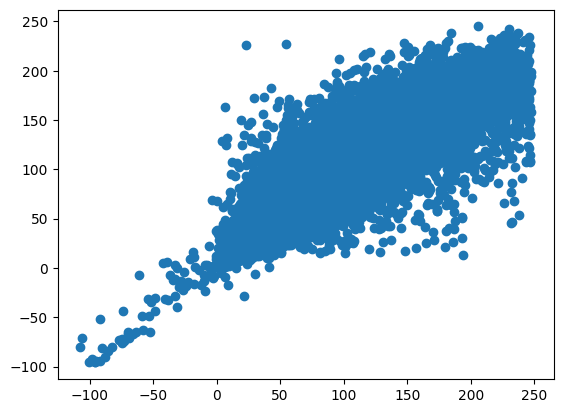

In [56]:
plt.scatter(y_test,predc)

### Training the Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

In [33]:
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [34]:
RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE Training data =" ,RMSE_train)
print("RMSE Test Data = ",RMSE_test)
print("Rsquared error value for train data = ",lm.score(X_train,y_train))
print("Rsquared error value for test data = ",lm.score(X_test,y_test))

RMSE Training data = 46.33329594874723
RMSE Test Data =  46.16438352508743
Rsquared error value for train data =  0.0035348938573963595
Rsquared error value for test data =  0.0031161752166192214


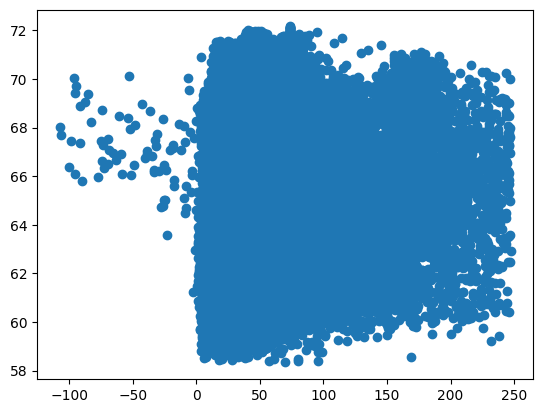

In [35]:
plt.scatter(y_test,pred)

In [36]:
lm.score(X_test,y_test)

0.0031161752166192214

### Decision Tree Regressor Model

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predct=dtr.predict(X_test)
predct

array([ 49.24387545,  62.21852302,  29.1631178 , ..., 127.75654618,
        11.47885269,  25.51634183])

In [38]:
dtr.score(X_test,y_test)

0.7975397275128658

In [39]:
train_pred=dtr.predict(X_train)
test_pred=dtr.predict(X_test)

In [40]:
RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_pred)))
print("RMSE Training data =" ,RMSE_train)
print("RMSE Test Data = ",RMSE_test)
print("Rsquared error value for train data = ",dtr.score(X_train,y_train))
print("Rsquared error value for test data = ",dtr.score(X_test,y_test))

RMSE Training data = 4.628054539985688e-10
RMSE Test Data =  20.80437504395754
Rsquared error value for train data =  1.0
Rsquared error value for test data =  0.7975397275128658


### From the above three model, we can see that random forest Regressor gives the highest accuracy , So we will prefer Random Forest Regressor as a prediction model

## Predicting the PM2.5 conc. value for the given questionarrie database

#### Extracting the data from the submission template file

In [186]:
df1=pd.read_excel('Round1a_Submission_Template.xlsx')

In [187]:
df1

,ID,City,Time Periods,PM2.5_Prediction
0,1,Delhi,2023-01-01 00:00:00,NaN
1,2,Delhi,2023-01-01 04:00:00,NaN
2,3,Delhi,2023-01-01 08:00:00,NaN
3,4,Delhi,2023-01-01 12:00:00,NaN
4,5,Delhi,2023-01-01 16:00:00,NaN
...,...,...,...,...
607,608,Bhilai,2023-03-01 04:00:00,NaN
608,609,Bhilai,2023-03-01 08:00:00,NaN
609,610,Bhilai,2023-03-01 12:00:00,NaN
610,611,Bhilai,2023-03-01 16:00:00,NaN


In [188]:
df1['Time Periods']=pd.to_datetime(df1['Time Periods'])
df1['year']=df1['Time Periods'].dt.year
df1['month']=df1['Time Periods'].dt.month
df1['day']=df1['Time Periods'].dt.day
df1['hour']=df1['Time Periods'].dt.hour
df1['mins']=df1['Time Periods'].dt.minute
df1['seconds']=df1['Time Periods'].dt.second


In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'])
df1.values
df1.head()

,ID,City,Time Periods,PM2.5_Prediction,year,month,day,hour,mins,seconds
0,1,8,2023-01-01 00:00:00,NaN,2023,1,1,0,0,0
1,2,8,2023-01-01 04:00:00,NaN,2023,1,1,4,0,0
2,3,8,2023-01-01 08:00:00,NaN,2023,1,1,8,0,0
3,4,8,2023-01-01 12:00:00,NaN,2023,1,1,12,0,0
4,5,8,2023-01-01 16:00:00,NaN,2023,1,1,16,0,0


In [190]:
df1_x=df1.drop(['Time Periods','PM2.5_Prediction','ID'],axis=1)
df1_x.head()

,City,year,month,day,hour,mins,seconds
0,8,2023,1,1,0,0,0
1,8,2023,1,1,4,0,0
2,8,2023,1,1,8,0,0
3,8,2023,1,1,12,0,0
4,8,2023,1,1,16,0,0


### Predicting the values using rfr model

In [191]:
pred = rfr.predict(df1_x)
df1_x['PM2.5_predicted'] = pred

df1_x.head()

,City,year,month,day,hour,mins,seconds,PM2.5_predicted
0,8,2023,1,1,0,0,0,206.122461
1,8,2023,1,1,4,0,0,220.880497
2,8,2023,1,1,8,0,0,220.880497
3,8,2023,1,1,12,0,0,196.788971
4,8,2023,1,1,16,0,0,185.706661


In [192]:
from datetime import datetime,timedelta

In [193]:
df1_x['City']=le.inverse_transform(df1_x['City'])
df1_x['Time Periods']=pd.to_datetime(df1_x[['year','month','day','hour']])
df1_x.head()

,City,year,month,day,hour,mins,seconds,PM2.5_predicted,Time Periods
0,Delhi,2023,1,1,0,0,0,206.122461,2023-01-01 00:00:00
1,Delhi,2023,1,1,4,0,0,220.880497,2023-01-01 04:00:00
2,Delhi,2023,1,1,8,0,0,220.880497,2023-01-01 08:00:00
3,Delhi,2023,1,1,12,0,0,196.788971,2023-01-01 12:00:00
4,Delhi,2023,1,1,16,0,0,185.706661,2023-01-01 16:00:00


In [203]:
final_file=df1_x.drop(['year','month','day','hour','mins','seconds'],axis=1)
final_file=final_file[['City','Time Periods','PM2.5_predicted']]
final_file.head()

,City,Time Periods,PM2.5_predicted
0,Delhi,2023-01-01 00:00:00,206.122461
1,Delhi,2023-01-01 04:00:00,220.880497
2,Delhi,2023-01-01 08:00:00,220.880497
3,Delhi,2023-01-01 12:00:00,196.788971
4,Delhi,2023-01-01 16:00:00,185.706661


In [204]:
final_file.to_excel(' lokhandeabhishek2002@gmail.com_round1a.xlsx', index=False)

# Summary

- Collected the database of PM2.5 concentartion and also other variables of 34 cities of India from the past three years.
- Perform Explortary data analysis on it
- Evaluated Null values with mean of the data
- Removed the columns that contain more number of null values.
- Converted Time Period from string datatype to datetime and extracted month,year,day etc.
- Perform Data Visualisation 
- From the bar chart we can conclude that 'Delhi' and 'Chandigrah' are the two cities having higher amount of PM2.5 concentration
- Agra city was recorded with maximum PM2.5 conc. over the past 3 years
- There has been general trend seen over the last 3 years that January Month has been noted as having highest PM2.5 conc and July has been noted as Lowest PM2.5 Conc.
- Perform Feature Engineering
- Converted categorical value to the cardinal value
- Standarize the scale to appropriate scale, but this doesn't have much impact on accuracy of model so neglected
- Detection of the outlier value using Z Score method
- Perform Machine learning model
- Random Forest Regressor with score of 86%
- Linear Regression with score of 0.3%
- Decission Tree Regressor with score of 79%
- Most Efficient model was RFR, so preferred RFR model to predict the future values
- Predicted the values that was provided in Questionarrie template




# Info about PM2.5

- PM2.5 refers to atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair.Fine particles can come from various sources. They include power plants, motor vehicles, airplanes, residential wood burning, forest fires, agricultural burning, volcanic eruptions and dust storms.Some are emitted directly into the air, while others are formed when gases and particles interact with one another in the atmosphere.For instance, gaseous sulfur dioxide emitted from power plants reacts with oxygen and water droplets in the air to form sulfuric acid as a secondary particle

### Why Are PM2.5 Dangerous?

- since they are so small and light, fine particles tend to stay longer in the air than heavier particles. This increases the chances of humans and animals inhaling them into the bodies. Owing to their minute size, particles smaller than 2.5 micrometers are able to bypass the nose and throat and penetrate deep into the lungs and some may even enter the circulatory system.

- Studies have found a close link between exposure to fine particles and premature death from heart and lung disease. Fine particles are also known to trigger or worsen chronic disease such as asthma, heart attack, bronchitis and other respiratory problems.

### How to Read PM2.5 Readings?

- Due to the many adverse effects fine particles can inflict on a large number of people, PM2.5 is one of the major pollutants closely monitored by health authorities around the world. You will most likely come across a dedicated column for PM2.5 alongside the Air Quality Index (AQI), Pollutants Standards Index (PSI) or the air quality standards adopted by your country.

- On a very clear and non-hazy day, the PM2.5 concentration can be as low as 5 μg/m3 or below. The 24-hour concentration of PM2.5 is considered unhealthy when it rises above 35.4 μg/m3.

### How to Protect Yourself Against PM2.5?

- Stay indoor and close all windows and openings that allow polluted air to enter, when possible.
- Turn on an air purifier that is equipped with a HEPA filter. Only a HEPA filter can effectively remove fine particles from the air.
- Most air filters in air conditioners are not HEPA filters as the latter will reduce air intake and would require the motor to work harder to push / pull air through. But an air conditioner is still helpful when fresh air intake is limited as it helps to circulate air and cool down (or warm up) room temperature.
- When most or all windows are closed, do not burn candle, incense or operate devices that emit smoke or gas to prevent harmful particles and gas (such as carbon monoxide) from building up.
- If you are a road warrior who must drive in all weather conditions, get a real air purifier for your car that comes with at least HEPA and activated carbon filters. A normal car filter can’t even remove traffic exhaust properly, let alone microscopic particles.